<a href="https://colab.research.google.com/github/Ron-Tagne/Stroke-Prediction-Project/blob/main/Stroke_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Saving Lives with Machine Learning: Identifying Individuals at Risk of Stroke**

In [37]:
from google.colab import drive

In [38]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machinelearning
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek #To resample imbalanced target feature
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score

In [40]:
# Loading the dataset
df= pd.read_csv('/content/drive/MyDrive/Data Science/Personal Projects/EDs + Data Cleaning/Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv',
                index_col= 'id')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [42]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
features_category= ['gender','hypertension', 'heart_disease', 'ever_married',
                    'work_type', 'Residence_type','smoking_status']

features_continous= ['age','avg_glucose_level','bmi']

Target_variable= ['stroke']

features= ['gender','hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type','smoking_status','age',
           'avg_glucose_level','bmi']



In [44]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [45]:
print(df['gender'].value_counts())

print(df['hypertension'].value_counts())


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64


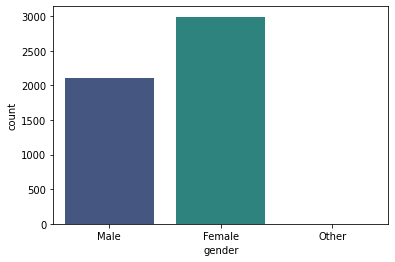

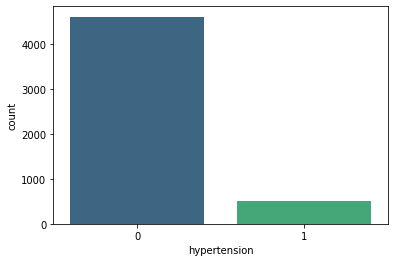

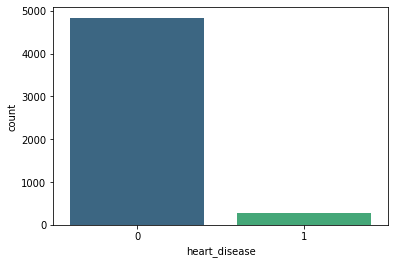

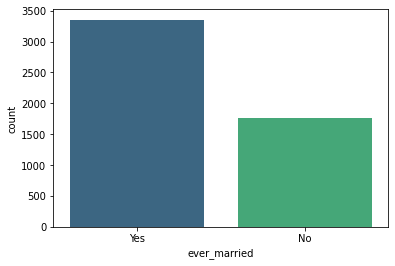

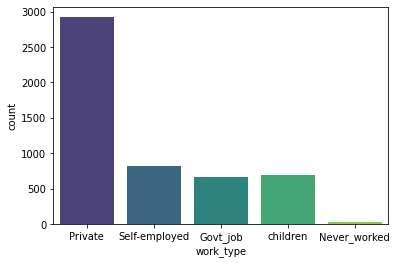

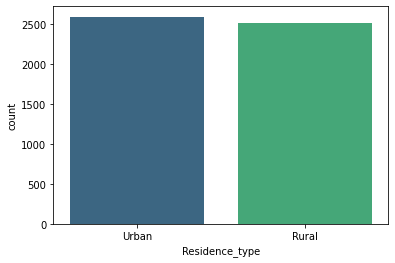

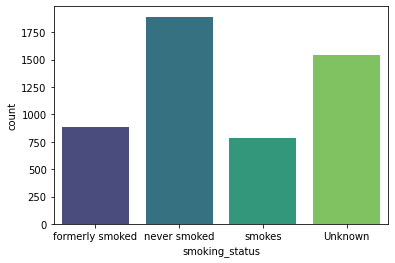

In [46]:
for features in features_category:
  sns.countplot(data=df, x=features, palette="viridis")
  plt.show()

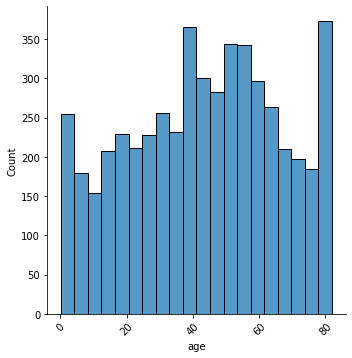

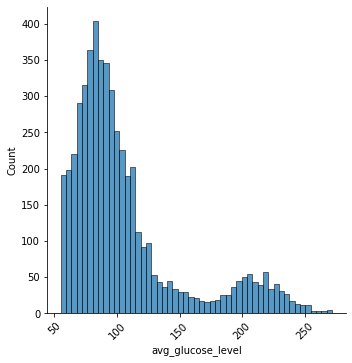

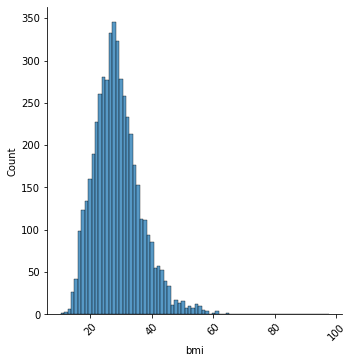

In [47]:
for features in features_continous:
  sns.displot(data=df, x=features, palette="viridis")
  plt.xticks(rotation= 45)
  plt.show()

## ***Data Cleaning*** 

- Removing duplicates/ missing values

In [48]:
# observed how many null values were in the bmi
df.loc[df['bmi']> 65]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [49]:
# deleted outliers in bmi
df.drop( df[df['bmi']> 65].index, inplace= True)

In [50]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [51]:
# To treat all missing data, 
# interpolation was performed since 201 (3.93%) of bmi data was missing.
df.interpolate(inplace= True)

In [52]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [53]:
# No duplicated data fields
df.duplicated().sum()

0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5105 non-null   object 
 1   age                5105 non-null   float64
 2   hypertension       5105 non-null   int64  
 3   heart_disease      5105 non-null   int64  
 4   ever_married       5105 non-null   object 
 5   work_type          5105 non-null   object 
 6   Residence_type     5105 non-null   object 
 7   avg_glucose_level  5105 non-null   float64
 8   bmi                5105 non-null   float64
 9   smoking_status     5105 non-null   object 
 10  stroke             5105 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 478.6+ KB


In [55]:
df.smoking_status.value_counts()

never smoked       1890
Unknown            1542
formerly smoked     885
smokes              788
Name: smoking_status, dtype: int64

## ***Data Visuals***

In [56]:
# replace strings with integers 
df.gender.replace( ['Female', 'Male', 'Other'], [0,1,2], inplace= True)
df.ever_married.replace( ['No','Yes'], [0,1], inplace= True)
df.work_type.replace( ['Private','Self-employed', 'children', 'Govt_job', 'Never_worked'], [0,1,2,3,4], inplace= True)
df.Residence_type.replace( ['Rural','Urban'], [0,1], inplace= True)
df.smoking_status.replace(['never smoked','Unknown','formerly smoked', 'smokes'], [0,1,2,3], inplace= True)
df.hypertension.replace(['No','Yes'], [0,1],  inplace= True)
df.heart_disease.replace( ['No','Yes'], [0,1], inplace= True)
df.stroke.replace( ['No','Yes'], [0,1], inplace= True)

In [57]:
# Change all datatypes to float
df = df.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5105 non-null   float64
 1   age                5105 non-null   float64
 2   hypertension       5105 non-null   float64
 3   heart_disease      5105 non-null   float64
 4   ever_married       5105 non-null   float64
 5   work_type          5105 non-null   float64
 6   Residence_type     5105 non-null   float64
 7   avg_glucose_level  5105 non-null   float64
 8   bmi                5105 non-null   float64
 9   smoking_status     5105 non-null   float64
 10  stroke             5105 non-null   float64
dtypes: float64(11)
memory usage: 478.6 KB


In [58]:
df.gender.value_counts()

0.0    2992
1.0    2112
2.0       1
Name: gender, dtype: int64

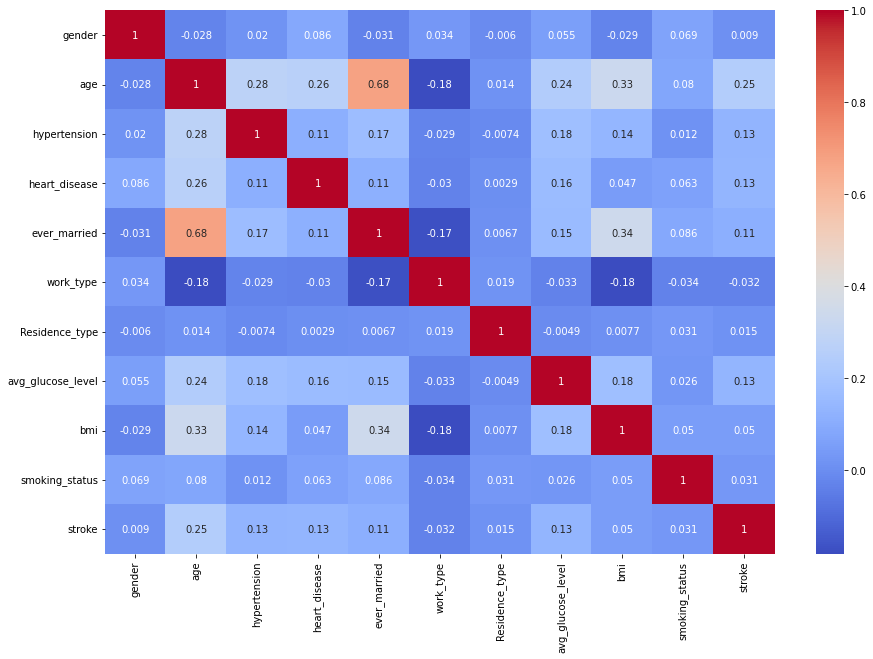

In [59]:
# corr
corr =df.corr()

# correlation heatmap
plt.figure(figsize= (15,10))
sns.heatmap(corr, 
        annot= True,
        cmap= 'coolwarm', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [60]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

This correlation matrix shows that 'age', 'hypertension', 'heart_disease', 'ever_married' and 'avg_glucose_level' hasa stronger corrlation with the target variable 'stroke'. 

## Data Visualisation: 

### Univariate and Bivariate analysis

Age

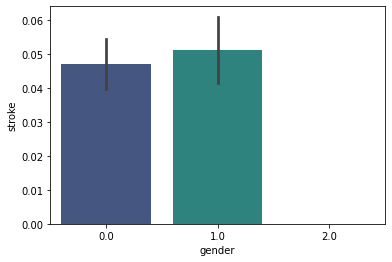

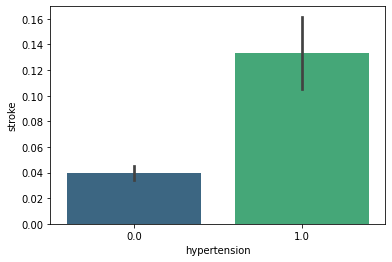

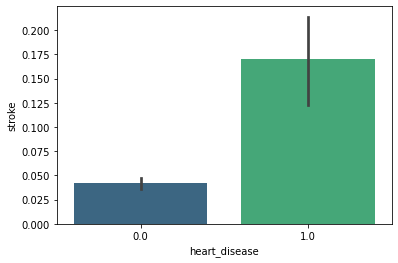

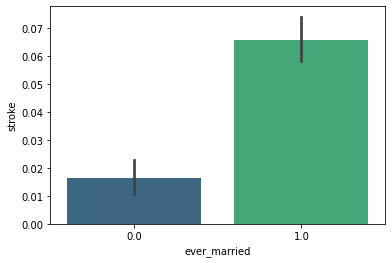

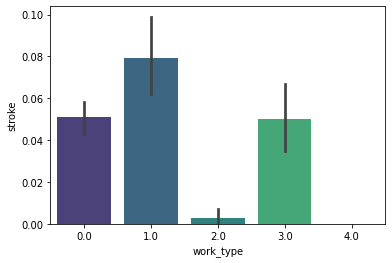

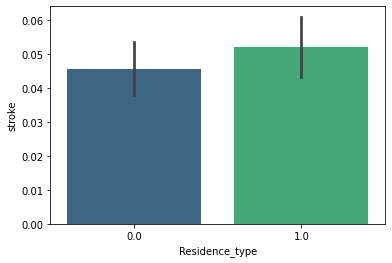

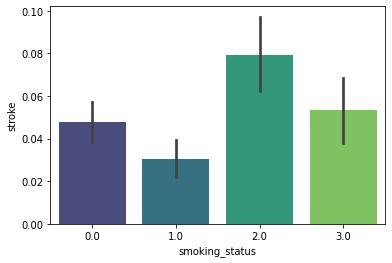

In [61]:
for features in features_category:
  sns.barplot(data=df, x=features, y= 'stroke', palette="viridis")
  plt.show()

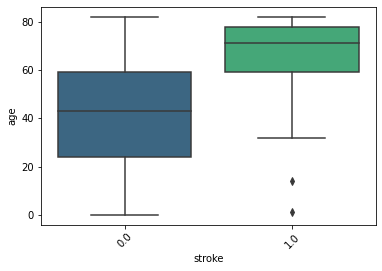

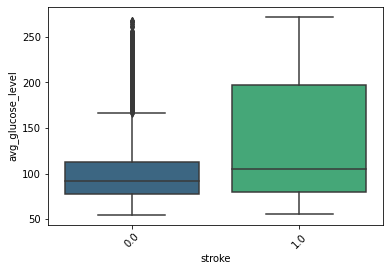

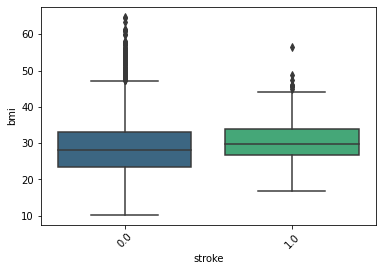

In [62]:
for features in features_continous:
  sns.boxplot(data=df, x= 'stroke', y= features, palette="viridis")
  plt.xticks(rotation= 45)
  plt.show()

'avg_glucose_level':

Research has found that it is possible for a person to have an average glucose level above 175 mg/dL alothough it is conidered to be high. However for the puproses of finding a predicting a stroke under 'typical'circumstance, individuals that have a average glucose level greater than 150 and no stroke will be removed from the analysis

'bmi':

research has found a strong association between individuals who are overweight/ obese and stroke. Thus, fields where individuals with bmi greater than 50 and do not have stroke will be removed  greater than 

In [63]:
df.loc[(df['avg_glucose_level'] >= 175) & (df['stroke']== 0)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
32257,0.0,47.0,0.0,0.0,1.0,0.0,1.0,210.95,50.1,1.0,0.0
41413,0.0,75.0,0.0,1.0,1.0,1.0,0.0,243.53,27.0,0.0,0.0
28674,0.0,74.0,1.0,0.0,1.0,1.0,1.0,205.84,54.6,0.0,0.0
4057,1.0,71.0,0.0,0.0,1.0,0.0,1.0,198.21,27.3,2.0,0.0
36275,0.0,54.0,0.0,0.0,1.0,0.0,0.0,206.72,26.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28788,1.0,40.0,0.0,0.0,1.0,0.0,1.0,191.15,33.6,3.0,0.0
38009,1.0,41.0,0.0,0.0,1.0,0.0,1.0,223.78,32.3,0.0,0.0
11184,0.0,82.0,0.0,0.0,1.0,1.0,0.0,211.58,36.9,0.0,0.0


In [64]:
df.loc[(df['bmi'] >= 47) & (df['stroke']== 0)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
32257,0.0,47.0,0.0,0.0,1.0,0.0,1.0,210.95,50.1,1.0,0.0
28674,0.0,74.0,1.0,0.0,1.0,1.0,1.0,205.84,54.6,0.0,0.0
72911,0.0,57.0,1.0,0.0,1.0,0.0,0.0,129.54,60.9,3.0,0.0
1703,0.0,52.0,0.0,0.0,1.0,0.0,1.0,82.24,54.7,2.0,0.0
38805,0.0,37.0,0.0,0.0,1.0,0.0,0.0,75.18,48.2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1696,0.0,43.0,0.0,0.0,1.0,0.0,1.0,100.88,47.6,3.0,0.0
72696,0.0,53.0,0.0,0.0,1.0,0.0,1.0,70.51,54.1,0.0,0.0
16245,1.0,51.0,1.0,0.0,1.0,1.0,0.0,211.83,56.6,0.0,0.0


In [65]:
df.loc[(df['avg_glucose_level'] >= 146) & (df['stroke']== 0)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
46136,1.0,14.0,0.0,0.0,0.0,4.0,0.0,161.28,19.1,1.0,0.0
32257,0.0,47.0,0.0,0.0,1.0,0.0,1.0,210.95,50.1,1.0,0.0
41413,0.0,75.0,0.0,1.0,1.0,1.0,0.0,243.53,27.0,0.0,0.0
28674,0.0,74.0,1.0,0.0,1.0,1.0,1.0,205.84,54.6,0.0,0.0
63884,0.0,37.0,0.0,0.0,1.0,0.0,0.0,162.96,39.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68967,1.0,39.0,0.0,0.0,1.0,0.0,1.0,179.38,27.7,1.0,0.0
66684,1.0,70.0,0.0,0.0,1.0,1.0,0.0,193.88,24.3,1.0,0.0
39935,0.0,34.0,0.0,0.0,1.0,0.0,0.0,174.37,23.0,0.0,0.0


In [66]:
# Removing 'age' outliers 
index_age= df[(df['age']< 20) & (df['stroke']== 1)].index

df.drop(index_age, inplace= True)

# Removing 'avg_glucose_level' outliers 
index_glucose_lvl_0= df[ (df['avg_glucose_level']> 143) & (df['stroke']== 0)].index

df.drop(index_glucose_lvl_0, inplace= True)

# Removing 'bmi' outliers 
index_bmi_0= df[(df['bmi']> 45) & (df['stroke']== 0)].index

df.drop(index_bmi_0, inplace= True)

index_bmi_1= df[(df['bmi']> 44) & (df['stroke']== 1)].index

df.drop(index_bmi_1, inplace= True)

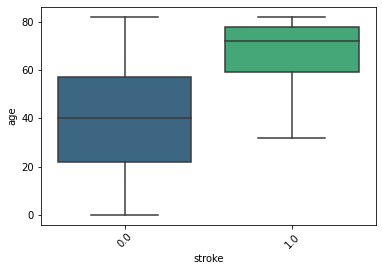

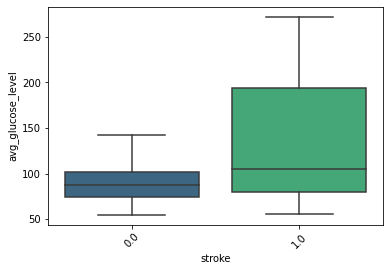

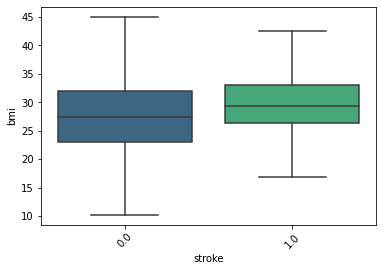

In [67]:
for features in features_continous:
  sns.boxplot(data=df, x= 'stroke', y= features, palette="viridis")
  plt.xticks(rotation= 45)
  plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4293 non-null   float64
 1   age                4293 non-null   float64
 2   hypertension       4293 non-null   float64
 3   heart_disease      4293 non-null   float64
 4   ever_married       4293 non-null   float64
 5   work_type          4293 non-null   float64
 6   Residence_type     4293 non-null   float64
 7   avg_glucose_level  4293 non-null   float64
 8   bmi                4293 non-null   float64
 9   smoking_status     4293 non-null   float64
 10  stroke             4293 non-null   float64
dtypes: float64(11)
memory usage: 531.5 KB


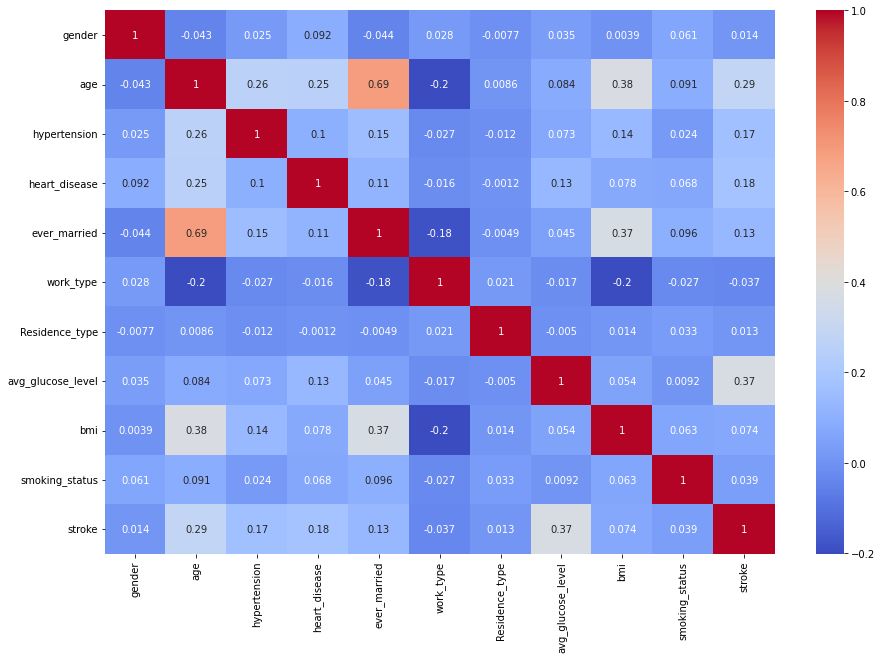

In [69]:
# corr
corr =df.corr()

# correlation heatmap
plt.figure(figsize= (15,10))
sns.heatmap(corr, 
        annot= True,
        cmap= 'coolwarm', 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## Summary:

- features_continous:


- features_category:

There is a class imbalance for the feature target 'stroke' is thus this would need to addressed.


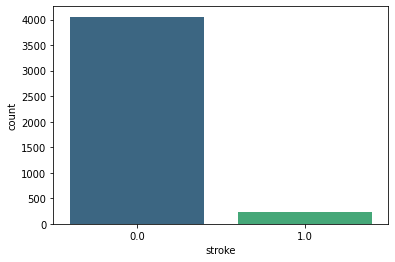

In [95]:
# 0= No, 1= Yes
sns.countplot(data=df, x=df['stroke'], palette="viridis")

### Split X and Y


In [70]:
Target_variable= ['stroke']

features= ['gender', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type','smoking_status','age',
           'avg_glucose_level','bmi' ]

Features2= ['age','avg_glucose_level', 'bmi' ]

X= df[features].values.reshape(-1, 10)

y= df['stroke']

print(X.shape)
print(y.shape)

(4293, 10)
(4293,)


In [71]:
# Feature
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.3,
    random_state=0)

X_train.shape, X_test.shape



((3005, 10), (1288, 10))

### Resampling Imbalanced target outcomes

In [72]:
stroke= df[df['stroke']== 1]

no_stroke= df[df['stroke']== 0]

print(stroke.shape, no_stroke.shape)

(237, 11) (4056, 11)


In [73]:
# Implementing oversampling to handling feature imbalance
smk= SMOTETomek(random_state=40)
X_res, y_res= smk.fit_resample(X,y)


X_res.shape, y_res.shape # Dataset wil be oversampled

((8070, 10), (8070,))

In [74]:
# See how the shape for for the sample has changed
from collections import Counter 
print('Orignal dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Orignal dataset shape Counter({0.0: 4056, 1.0: 237})
Resampled dataset shape Counter({1.0: 4035, 0.0: 4035})


In [75]:
## RandomeOversampler to handle 
from imblearn.over_sampling import RandomOverSampler

os= RandomOverSampler(random_state= 42)
X_train_res, y_train_res = os.fit_resample(X,y)

print('Orignal dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Orignal dataset shape Counter({0.0: 4056, 1.0: 237})
Resampled dataset shape Counter({1.0: 4056, 0.0: 4056})


In [76]:
# Run model

model=DecisionTreeClassifier(random_state= 15, criterion = 'entropy', max_depth=10)
model= model.fit(X_train_res,y_train_res)

### Feature selection

In [77]:
features= ['gender','hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type','smoking_status','age',
           'avg_glucose_level','bmi']

feature_importance_col = []
feature_importance = []

for i,column in enumerate(df[features]):
  print('The feature importance for {} is: {}'.format(column, model.feature_importances_[i]))


  feature_importance_col.append(column)
  feature_importance.append(model.feature_importances_[i])

The feature importance for gender is: 0.02097609850008045
The feature importance for hypertension is: 0.005579693640687892
The feature importance for heart_disease is: 0.0007735070203814587
The feature importance for ever_married is: 0.011038066351933416
The feature importance for work_type is: 0.019344496752047066
The feature importance for Residence_type is: 0.00928356315867766
The feature importance for smoking_status is: 0.03749892434260319
The feature importance for age is: 0.5345725446936179
The feature importance for avg_glucose_level is: 0.22399693892286418
The feature importance for bmi is: 0.13693616661710667


In [78]:
# Turn Feature importance into a dataframe
fi_df= zip(feature_importance_col, feature_importance)
fi_df= pd.DataFrame(fi_df, columns= ['Feature', 'Feature Importance'])

# Sort by Feature importance
fi_df= fi_df.sort_values('Feature Importance', ascending= False).reset_index()
fi_df

,index,Feature,Feature Importance
0,7,age,0.534573
1,8,avg_glucose_level,0.223997
2,9,bmi,0.136936
3,6,smoking_status,0.037499
4,0,gender,0.020976
5,4,work_type,0.019344
6,3,ever_married,0.011038
7,5,Residence_type,0.009284
8,1,hypertension,0.005580
9,2,heart_disease,0.000774


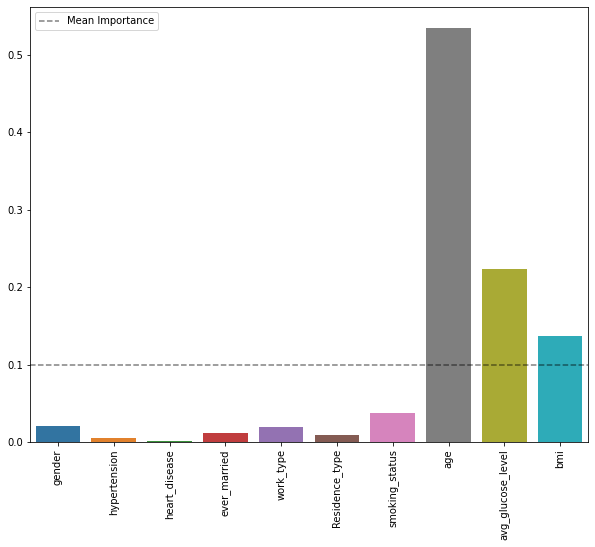

In [79]:
# Plot Meant importance
plt.figure(figsize=(10,8))
sns.barplot(
    x= feature_importance_col,
    y= feature_importance
)
plt.axhline(np.mean(feature_importance), color='k', linestyle="--",
            alpha=0.5, label="Mean Importance")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [80]:
# New Features after feature selction has been conducted.
Target_variable= ['stroke']

features2= ['age','avg_glucose_level', 'bmi']

X2= df[features2].values.reshape(-1, 3)

y2= df['stroke']

print(X2.shape)
print(y.shape)


(4293, 3)
(4293,)


In [81]:
# Test and split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size= 0.3,
    random_state=0)

X_train2.shape, X_test2.shape

((3005, 3), (1288, 3))

In [82]:
# Resampling of new features selected
os= RandomOverSampler(random_state= 42)
X_train_res2, y_train_res2 = os.fit_resample(X2,y2)

print('Orignal dataset shape {}'.format(Counter(y2)))
print('Resampled dataset shape {}'.format(Counter(y_train_res2)))

Orignal dataset shape Counter({0.0: 4056, 1.0: 237})
Resampled dataset shape Counter({1.0: 4056, 0.0: 4056})


### Running Logistic Regression Model

**first Model- no Synthetic Minority Over-Sampling Technique and Tomek links applied or features removed**

In [83]:
# Training the model- No Resampling 
logR1= LogisticRegression(multi_class='auto', solver='lbfgs',max_iter=200)

model_fit1= logR1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# predict- predict class labels for samples in x
logR1.predict(X_train)
y_pred1= logR1.predict(X_train)

In [85]:
print('first Model- no resampling or features removed')
# Accuracy on the Trained data
print('Training Accuracy Score:', logR1.score(X_train,y_train))

# Accuracy on the Test data
print('Testing Accuracy Score:', logR1.score(X_test,y_test))

# Classification Report
print(classification_report(y_train, y_pred1))

first Model- no resampling or features removed
Training Accuracy Score: 0.9620632279534109
Testing Accuracy Score: 0.9611801242236024
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2842
         1.0       0.95      0.32      0.48       163

    accuracy                           0.96      3005
   macro avg       0.95      0.66      0.73      3005
weighted avg       0.96      0.96      0.95      3005



**Second Model- Synthetic Minority Over-Sampling Technique and Tomek links applied but no features selection conducted**

In [86]:
# Training the model- Overresampling but no features selction conducted
logR2= LogisticRegression(multi_class='auto', solver='lbfgs',max_iter=200)

model_fit2= logR2.fit(X_train_res,y_train_res)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# predict- predict class labels for samples in x
logR2.predict(X_train_res)
y_pred2= logR2.predict(X_train_res)


In [88]:
print('Second Model- Overresampling but no features removed')

# Accuracy on the Trained data
print('Training Accuracy Score:', logR2.score(X_train_res,y_train_res))

# Accuracy on the Test data
print('Testing Accuracy Score:', logR2.score(X_test,y_test))

# Classification Report
print(classification_report(y_train_res, y_pred2))

Second Model- Overresampling but no features removed
Training Accuracy Score: 0.8122534516765286
Testing Accuracy Score: 0.7989130434782609
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      4056
         1.0       0.81      0.82      0.81      4056

    accuracy                           0.81      8112
   macro avg       0.81      0.81      0.81      8112
weighted avg       0.81      0.81      0.81      8112



**Third Model- Synthetic Minority Over-Sampling Technique and Tomek links applied + importance features selected**

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size= 0.3,
    random_state=0)

X_train2.shape, X_test2.shape

((3005, 3), (1288, 3))

In [90]:
# Training the model- Oversampling + importance features selected
logR3= LogisticRegression(multi_class='auto', solver='lbfgs',max_iter=200)

model_fit3= logR3.fit(X_train_res2, y_train_res2)

In [91]:
# predict- predict class labels for samples in x
logR3.predict(X_train_res2)
y_pred3= logR3.predict(X_train_res2)


In [92]:
print('Third Model- Oversampling conducted + only important features selected')

# Accuracy on the Trained data
print('Training Accuracy Score:', logR3.score(X_train_res2,y_train_res2))

# Accuracy on the Test data
print('Testing Accuracy Score:', logR3.score(X_test2,y_test2))

# Classification Report
print(classification_report(y_train_res2, y_pred3))

Third Model- Oversampling conducted + only important features selected
Training Accuracy Score: 0.806336291913215
Testing Accuracy Score: 0.8004658385093167
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      4056
         1.0       0.80      0.82      0.81      4056

    accuracy                           0.81      8112
   macro avg       0.81      0.81      0.81      8112
weighted avg       0.81      0.81      0.81      8112

